
needed "merged data - country rating.csv" file as "merged.csv"




In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [ ]:
rating = pd.read_csv('merged.csv')

In [ ]:
rating.head()

,ISO code,Country,S&P Rating,S&P Outlook,Moody's rating,Moody's Outlook,Fitch Rating,Fitch Outlook,Date (MM/YYYY)
0,AL,Albania,B+,STA,B1,STA,NaN,NaN,03/2013
1,AL,Albania,B1,STABLE,B1,STABLE,NaN,NaN,03/01/2013
2,AL,Albania,B+,STABLE,B1,STABLE,NaN,NaN,12/10/2012
3,AL,Albania,B+,STABLE,B1,STABLE,NaN,NaN,26/07/2012
4,AL,Albania,B+,STABLE,B1,STABLE,NaN,NaN,08/06/2012


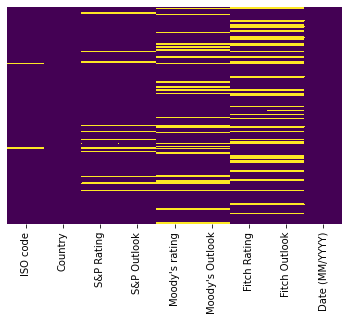

In [ ]:
sns.heatmap(rating.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
rating_demo=rating.copy()[["S&P Rating","S&P Outlook","Moody's rating","Moody's Outlook"]]
rating_demo

,S&P Rating,S&P Outlook,Moody's rating,Moody's Outlook
0,B+,STA,B1,STA
1,B1,STABLE,B1,STABLE
2,B+,STABLE,B1,STABLE
3,B+,STABLE,B1,STABLE
4,B+,STABLE,B1,STABLE
...,...,...,...,...
1478,B+,STABLE,NaN,NaN
1479,B+,STABLE,NaN,NaN
1480,B+,STABLE,NaN,NaN
1481,B+,STABLE,NaN,NaN


In [ ]:
values={'AAA':21,
        'AA+':20,
        'AA':19,
        'AA-':18,
        'A+':17,
        'A':16,
        'A-':15,
        'BBB+':14,
        'BBB':13,
        'BBB-':12,
        'BB+':11,
        'BB':10,
        'BB-':9,
        'B+':8,
        'B':7,
        'B-':6,
        'CCC+':5,
        'CCC':4,
        'CCC-':3,
        'CC':2,
        'SD':1,
        'D':1,
        'STABLE':0,
        'STA':0,'POSITIVE':1,'NEGITIVE':-1,"NEG":-1,"WATCH NEGITIVE":-1,
        21:'AAA',
        20:'AA+',
        19:'AA',
        18:'AA-',17:'A+',16:'A',15:'A-',14:'BBB+',13:'BBB',12:'BBB-',
        11:'BB+',10:'BB',9:'BB-',8:'B+',7:'B',6:'B-',
        5:'CCC+',4:'CCC',3:'CCC-',2:'CC',1:'D'}

In [ ]:
Charaterization_of_dept={
    'HIGHEST QUALITY':['AAA'],
    'HIGH QUALITY':['AA+','AA','AA-'],
    'STRONG PAYMENT CAPACITY':['A+','A-','A'],
    'ADEQUATE PAYMENT CAPACITY':['BBB+','BBB','BBB-'],
    'LIKELY TO FULFIL OBLIGATIONS':['BB+','BB','BB-'],
    'HIGH CREDIT RISK':['B+','B','B-'],
    'VERY HIGH CERDIT RISK':['CCC+','CCC','CCC-'],
    'NEAR DEFAULT WITH POSSIBILITY OF RECOVERY':['CC'],
    'DEFAULT':['SD','D'],
    21:'HIGHEST QUALITY',
        20:'HIGH QUALITY',
        19:'HIGH QUALITY',
        18:'HIGH QUALITY',
        17:'STRONG PAYMENT CAPACITY',16:'STRONG PAYMENT CAPACITY',
        15:'STRONG PAYMENT CAPACITY',14:'ADEQUATE PAYMENT CAPACITY',
        13:'ADEQUATE PAYMENT CAPACITY',12:'ADEQUATE PAYMENT CAPACITY',

        11:'LIKELY TO FULFIL OBLIGATIONS',10:'LIKELY TO FULFIL OBLIGATIONS',
        9:'LIKELY TO FULFIL OBLIGATIONS',8:'HIGH CREDIT RISK',
        7:'HIGH CREDIT RISK',6:'HIGH CREDIT RISK',
        5:'VERY HIGH CERDIT RISK',4:'VERY HIGH CERDIT RISK',
        3:'VERY HIGH CERDIT RISK',2:'NEAR DEFAULT WITH POSSIBILITY OF RECOVERY',
        1:'DEFAULT'
}

In [ ]:
"""rating_demo.fillna(-1)
for Index,row in rating_demo.iterrows():
  if row["Moody's Outlook"] ==-1 or row["S&P Rating"]==-1 or row["S&P Outlook"]==-1 or row["Moody's rating"] ==-1:
    rating_demo.drop(index=Index,axis=0)
  else:
    row["Moody's Outlook"]=values[row["Moody's Outlook"]]
    row["S&P Rating"]=values[row["S&P Rating"]]
    row["S&P Outlook"]=values[row["S&P Outlook"]]
    row["Moody's rating"]=values[row["Moody's rating"]]

rating_demo.corr()
"""
"""rating_demo.dropna()
sns.pairplot(rating_demo,size=1.5)"""

'rating_demo.dropna()\nsns.pairplot(rating_demo,size=1.5)'

In [ ]:
"""rating_demo.fillna(-1)
rating_demo.corr()
plt.figure(figsize=(4,4))
sns.heatmap(rating_demo.corr())"""

'rating_demo.fillna(-1)\nrating_demo.corr()\nplt.figure(figsize=(4,4))\nsns.heatmap(rating_demo.corr())'

In [ ]:
#countries=set(rating['ISO code'])
#for i in county:
#  print(rating)
#for code in countries:
code='KP'  #EG,HK,MS
spRating=rating['S&P Rating']
df=rating.loc[rating['ISO code'] == code]
print(df)
df=df.fillna(-1)
index=df[df['ISO code'] == code].index.to_numpy()
try:
  heha=df['S&P Rating']
except:
  pass
stability=df['S&P Outlook']
map={'STABLE':0,
    'POSITIVE':0,
    'NEGATIVE':0}
map1={}
suma=0
count=0
for i in stability:
  if not pd.isna(i) and i!=-1:
    #map1[i]=map.get(i,0)+1
    if i in ['STA','STABLE']:
      map['STABLE']=map.get('STABLE',0)+1
    elif i in ['POS','POSITIVE']:
      map['POSITIVE']=map.get('POSTIVE',0)+1
    elif i in ['NEG','NEGITIVE','WATCH NEGATIVE']:
      map['NEGATIVE']=map.get('NEGATIVE',0)+1
    else:
      map[i]=map.get(i,0)+1
for i in heha:
  if not pd.isna(i) and i!=-1:
    map1[i]=map.get(i,0)+1
    suma+=values[i]
    count+=1
lst=sorted(map.items(),key=lambda x:[x[1]])
lst1=sorted(map1.items(),key=lambda x:[x[1]])
if count==0:
  pass
predicted_value=suma/count
floor_value=np.floor(predicted_value)
ceil_value=np.ceil(predicted_value)
df['S&P Outlook'] = df['S&P Outlook'].replace('NEG','NEGATIVE')
df['S&P Outlook'] = df['S&P Outlook'].replace('POS','POSITIVE')
df['S&P Outlook'] = df['S&P Outlook'].replace('STA','STABLE')
if floor_value==ceil_value:
  df['S&P Rating'] = df['S&P Rating'].replace(-1,values[floor_value])
  df['S&P Outlook'] = df['S&P Outlook'].replace(-1,lst[-1][0])
else:
  floor_rating,ceil_rating=values[floor_value],values[ceil_value]
  floor_chara=Charaterization_of_dept[floor_value]
  ceil_chara=Charaterization_of_dept[ceil_value]
  if floor_chara==ceil_chara:
    df['S&P Rating'] = df['S&P Rating'].replace(-1,lst1[-1][0])
    df['S&P Outlook'] = df['S&P Outlook'].replace(-1,lst[-1][0])
  else:
    stability_value=lst[0][0]
    if stability_value in ['STA','STABLE']:
      df['S&P Rating'] = df['S&P Rating'].replace(-1,lst1[-1][0])
      df['S&P Outlook'] = df['S&P Outlook'].replace(-1,lst[-1][0])
      #df['S&P Outlook'] = df['S&P Outlook'].replace('STA','STABLE')
    elif stability_value in ['POSITIVE','POS']:
      df['S&P Rating'] = df['S&P Rating'].replace(-1,ceil_rating)
      df['S&P Outlook'] = df['S&P Outlook'].replace(-1,'POSITIVE')
      #df['S&P Outlook'] = df['S&P Outlook'].replace('POS','POSITIVE')
    else:
      df['S&P Rating'] = df['S&P Rating'].replace(-1,floor_rating)
      df['S&P Outlook'] = df['S&P Outlook'].replace(-1,'NEGATIVE')
      #df['S&P Outlook'] = df['S&P Outlook'].replace('NEG','NEGATIVE')
print(df)

    ISO code Country S&P Rating  ... Fitch Rating Fitch Outlook Date (MM/YYYY)
766       KP   Korea         A+  ...          NaN           NaN        03/2013
767       KP   Korea         A+  ...          NaN           NaN     03/01/2013
768       KP   Korea        NaN  ...          NaN           NaN     12/10/2012
769       KP   Korea        NaN  ...          NaN           NaN     26/07/2012
770       KP   Korea          A  ...           A+      POSITIVE     08/06/2012
771       KP   Korea          A  ...           A+      POSITIVE     15/03/2012
772       KP   Korea          A  ...           A+      POSITIVE     28/02/2012
773       KP   Korea          A  ...           A+      POSITIVE        01/2012
774       KP   Korea        NaN  ...           A+      POSITIVE        12/2011
775       KP   Korea          A  ...           A+        STABLE        09/2011

[10 rows x 9 columns]
    ISO code Country S&P Rating  ... Fitch Rating Fitch Outlook Date (MM/YYYY)
766       KP   Korea         

In [ ]:
countries=set(rating['ISO code'])
#for i in county:
#  print(rating)
for code in countries:
  #code='MS'
  #spRating=rating['S&P Rating']
  #df=rating.loc[rating['ISO code'] == code]
  rating=rating.fillna(-1)
  index=rating[rating['ISO code'] == code].index.to_numpy()
  try:
    heha=rating[index[0]:index[-1]+1]['S&P Rating']
  except:
    continue
  stability=rating[index[0]:index[-1]+1]['S&P Outlook']
  map={'STABLE':0,
      'POSITIVE':0,
      'NEGATIVE':0}
  map1={}
  suma=0
  count=0
  for i in stability:
    if not pd.isna(i) and i!=-1:
      #map1[i]=map.get(i,0)+1
      if i in ['STA','STABLE']:
        map['STABLE']=map.get('STABLE',0)+1
      elif i in ['POS','POSITIVE']:
        map['POSITIVE']=map.get('POSTIVE',0)+1
      elif i in ['NEG','NEGITIVE','WATCH NEGATIVE']:
        map['NEGATIVE']=map.get('NEGATIVE',0)+1
      else:
        map[i]=map.get(i,0)+1
  for i in heha:
    if not pd.isna(i) and i!=-1:
      map1[i]=map.get(i,0)+1
      try:
        suma+=values[i]
        count+=1
      except:
        continue
  lst=sorted(map.items(),key=lambda x:[x[1]])
  lst1=sorted(map1.items(),key=lambda x:[x[1]])
  if count==0:
    continue
  predicted_value=suma/count
  floor_value=np.floor(predicted_value)
  ceil_value=np.ceil(predicted_value)
  rating['S&P Outlook'] = rating['S&P Outlook'].replace('NEG','NEGATIVE')
  rating['S&P Outlook'] = rating['S&P Outlook'].replace('POS','POSITIVE')
  rating['S&P Outlook'] = rating['S&P Outlook'].replace('STA','STABLE')
  if floor_value==ceil_value:
    rating[index[0]:index[-1]+1]['S&P Rating'] = rating[index[0]:index[-1]+1]['S&P Rating'].replace(-1,values[floor_value])
    rating[index[0]:index[-1]+1]['S&P Outlook'] = rating[index[0]:index[-1]+1]['S&P Outlook'].replace(-1,lst[-1][0])
  else:
    floor_rating,ceil_rating=values[floor_value],values[ceil_value]
    floor_chara=Charaterization_of_dept[floor_value]
    ceil_chara=Charaterization_of_dept[ceil_value]
    if floor_chara==ceil_chara:
      rating[index[0]:index[-1]+1]['S&P Rating'] = rating[index[0]:index[-1]+1]['S&P Rating'].replace(-1,lst1[-1][0])
      rating[index[0]:index[-1]+1]['S&P Outlook'] = rating[index[0]:index[-1]+1]['S&P Outlook'].replace(-1,lst[-1][0])
    else:
      stability_value=lst[0][0]
      if stability_value in ['STA','STABLE']:
        rating[index[0]:index[-1]+1]['S&P Rating'] = rating[index[0]:index[-1]+1]['S&P Rating'].replace(-1,lst1[-1][0])
        rating[index[0]:index[-1]+1]['S&P Outlook'] = rating[index[0]:index[-1]+1]['S&P Outlook'].replace(-1,lst[-1][0])
        #df['S&P Outlook'] = df['S&P Outlook'].replace('STA','STABLE')
      elif stability_value in ['POSITIVE','POS']:
        rating[index[0]:index[-1]+1]['S&P Rating'] = rating[index[0]:index[-1]+1]['S&P Rating'].replace(-1,ceil_rating)
        rating[index[0]:index[-1]+1]['S&P Outlook'] = rating[index[0]:index[-1]+1]['S&P Outlook'].replace(-1,'POSITIVE')
        #df['S&P Outlook'] = df['S&P Outlook'].replace('POS','POSITIVE')
      else:
        rating[index[0]:index[-1]+1]['S&P Rating'] = rating[index[0]:index[-1]+1]['S&P Rating'].replace(-1,floor_rating)
        rating[index[0]:index[-1]+1]['S&P Outlook'] = rating[index[0]:index[-1]+1]['S&P Outlook'].replace(-1,'NEGATIVE')
        #df['S&P Outlook'] = df['S&P Outlook'].replace('NEG','NEGATIVE')





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
rating.columns

Index(['ISO code', 'Country', 'S&P Rating', 'S&P Outlook', 'Moody's rating',
       'Moody's Outlook', 'Fitch Rating', 'Fitch Outlook', 'Date (MM/YYYY)'],
      dtype='object')

In [ ]:
new_columns=['ISO code', 'Country', 'S&P Rating', 'S&P Outlook', "Moody's rating",
       "Moody's Outlook", 'Fitch Rating', 'Fitch Outlook', 'Date (MM/YYYY)']
filname="filling_missing_values.csv"
with open(filname,'w') as csvfile:
  csvwriter = csv.writer(csvfile) 
  csvwriter.writerow(new_columns)

op = open("filling_missing_values.csv", "r")
dt = csv.DictReader(op)
up_dt = []
for index,row in rating.iterrows():
    up_dt.append({'ISO code':row['ISO code'], 'Country':row['Country'], 'S&P Rating':row['S&P Rating'],
                  'S&P Outlook':row['S&P Outlook'], 
                  "Moody's rating":row["Moody's rating"],
       "Moody's Outlook":row["Moody's Outlook"], 'Fitch Rating':row['Fitch Rating'],
        'Fitch Outlook':row['Fitch Outlook'], 'Date (MM/YYYY)':row['Date (MM/YYYY)']})
op.close()
op = open("filling_missing_values.csv", "w", newline='')
headers = ['ISO code', 'Country', 'S&P Rating', 'S&P Outlook', "Moody's rating",
       "Moody's Outlook", 'Fitch Rating', 'Fitch Outlook', 'Date (MM/YYYY)']
data = csv.DictWriter(op, delimiter=',', fieldnames=headers)
data.writerow(dict((heads, heads) for heads in headers))
data.writerows(up_dt)
  
op.close()